# Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading the train and test datasets

In [3]:
train = pd.read_csv('traintitanic.csv')
test = pd.read_csv('testtitanic.csv')

# EDA on train dataset

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.shape

(891, 12)

# We have 12 columns including target one and 891 rows in our train set

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Three columns have missing values i.e Age,Cabin,Embarked. We have five columns having categorical data i.e. Name,Sex,Ticket,Cabin,Embarked

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

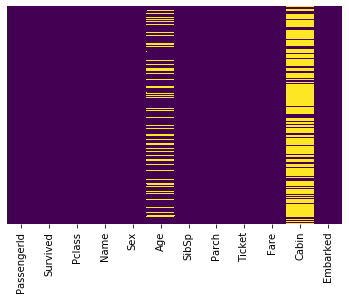

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Above is the heatmap for visualizing null values in our dataset

In [12]:
missing = round(100*train.isnull().sum()/len(train),2)
missing_df = pd.DataFrame(data=missing,columns=['percent_missing'],index=missing.index)
missing_df.sort_values(by=['percent_missing'],ascending=False)

,percent_missing
Cabin,77.10
Age,19.87
Embarked,0.22
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
SibSp,0.00
Parch,0.00


# As we can see we have three columns with null values i.e Cabin(77%),Age(20%),Embarked(.20%)

In [13]:
sns.set_style('whitegrid')

COUNTPLOT OF SURVIVED HAVING HUE AS SEX

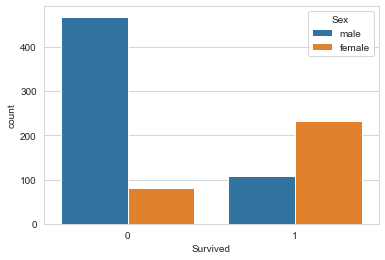

In [14]:
sns.countplot(x=train['Survived'],hue=train['Sex'])

From the above counter plot we can see number of women survived is more than men

COUNTPLOT OF SURVIVED HAVING HUE AS PCLASS

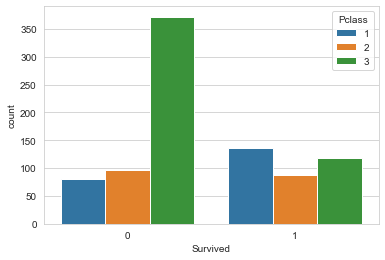

In [15]:
sns.countplot(x=train['Survived'],hue=train['Pclass'])

Here 3 class represents the cheapest class and people from that particular class were less survived

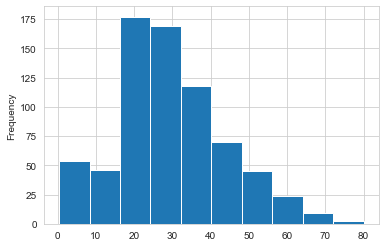

In [16]:
train['Age'].plot.hist()

Most of the people that are on board are between 20-40 years of age

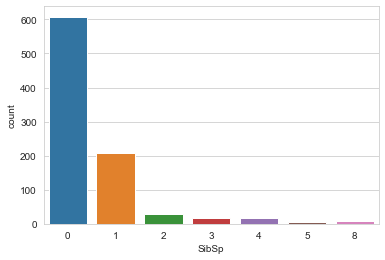

In [17]:
sns.countplot(x=train['SibSp'])

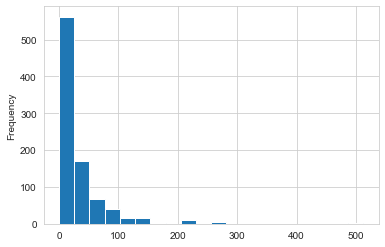

In [18]:
train['Fare'].plot.hist(bins=20)

In [19]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Dropping the column Cabin and imputing the column Age and Embarked

In [20]:
train.drop(['Cabin'],axis=1,inplace=True)

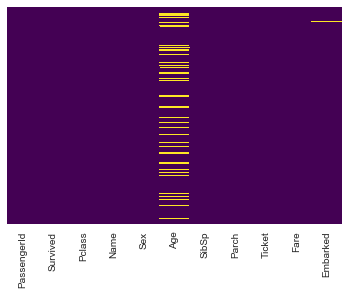

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

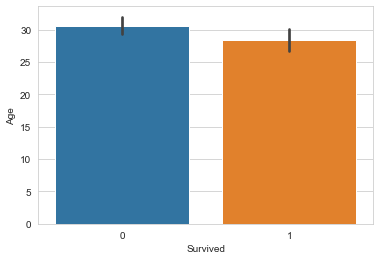

In [22]:
sns.barplot(x=train['Survived'],y=train['Age'])

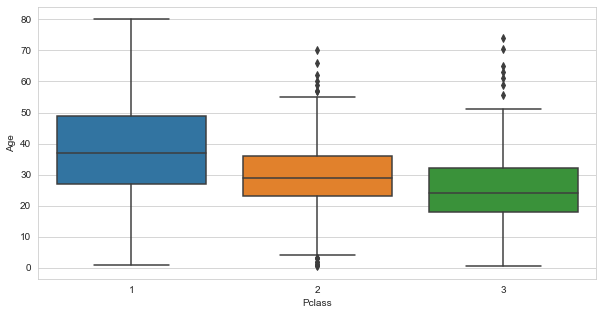

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train['Pclass'],y=train['Age'])

In [24]:
train.groupby(by='Pclass',axis=0)['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [25]:
med_dict = dict(train.groupby(by='Pclass',axis=0)['Age'].median())
med_dict

{1: 37.0, 2: 29.0, 3: 24.0}

Method to impute age on the basis of Pclass

In [26]:
def impute_age(col_1,col_2,med_dict):
    Age = col_1
    Pclass = col_2
    if pd.isnull(Age):
        
        if Pclass==1:
            return med_dict[1]
        elif Pclass==2:
            return med_dict[2]
        else:
            return med_dict[3]
        
    else:
        return Age

In [27]:
train['Age'] = train.apply(lambda x: impute_age(x['Age'],x['Pclass'],med_dict),axis=1)

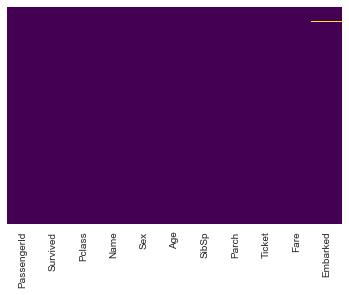

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

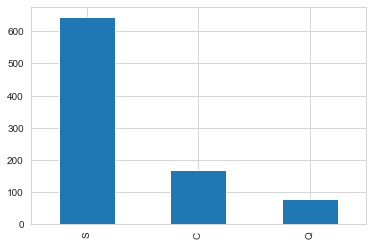

In [29]:
train['Embarked'].value_counts().plot.bar()

In [30]:
mode_embarked = train['Embarked'].mode()
mode_embarked

0    S
dtype: object

In [31]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].value_counts().index[0])
train['Embarked'].mode()

0    S
dtype: object

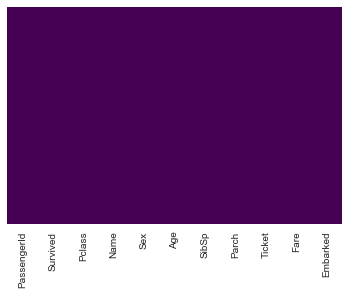

In [32]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Dataset is clean now with no missing values

In [33]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Dropping Some categorical columns and creating dummy variables for them

In [34]:
train_1 = train.drop(['Name','Ticket','PassengerId'],axis=1)

In [35]:
train_1 = pd.get_dummies(data=train_1,columns=['Sex','Embarked'],drop_first=True)


In [36]:
train_1.head(20)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,24.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


Splitting the data into feature and target

In [37]:
y = train_1['Survived']
X = train_1.drop(['Survived'],1)

Importing MinMaxScaler to scale the features

In [38]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [39]:
X_ = scale.fit_transform(X)
X = pd.DataFrame(X_,columns=X.columns)
X.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0
1,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0
2,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0
3,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0
4,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0
5,1.0,0.296306,0.000,0.000000,0.016510,1.0,1.0,0.0
6,0.0,0.673285,0.000,0.000000,0.101229,1.0,0.0,1.0
7,1.0,0.019854,0.375,0.166667,0.041136,1.0,0.0,1.0
8,1.0,0.334004,0.000,0.333333,0.021731,0.0,0.0,1.0
9,0.5,0.170646,0.125,0.000000,0.058694,0.0,0.0,0.0


Splitting the feature and target into train and test of train dataset

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 8), (268, 8), (623,), (268,))

Model Building process begins

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel = LogisticRegression()

In [44]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
prediction = logmodel.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [47]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       157
           1       0.78      0.72      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [48]:
print(accuracy_score(y_test,prediction))

0.8022388059701493


In [49]:
print(confusion_matrix(y_test,prediction))

[[135  22]
 [ 31  80]]


Checking VIF in our dataset

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [51]:
calc_vif(X_train)

,variables,VIF
0,Pclass,4.094411
1,Age,4.245617
2,SibSp,1.622012
3,Parch,1.697146
4,Fare,1.721684
5,Sex_male,3.166896
6,Embarked_Q,1.576498
7,Embarked_S,4.839019


All the features have low vif i.e less than 5

In [52]:
calc_vif(X_test)

,variables,VIF
0,Pclass,3.697755
1,Age,4.223082
2,SibSp,1.583741
3,Parch,1.489804
4,Fare,2.069193
5,Sex_male,2.881158
6,Embarked_Q,1.520713
7,Embarked_S,4.026514


In [53]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train) 
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()) 
res1 = logm1.fit() 
res1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      614
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -280.23
Date:                Mon, 24 Aug 2020   Deviance:                       560.46
Time:                        16:54:08   Pearson chi2:                     634.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9635      0.541      7.321      0.000       2.902       5.025
Pclass        -2.0182      0.347     -5.808      0.000      -2.699      -1.337
Age           -2.9388      0.765     -3.842      0.000      -4.438      -1.439
SibSp         -2.2868      0.945     -2.419      0.016      -4.139      -0.434
Parch         -0.5939      0.860     -0.691      0.490      -2.280       1.092
Fare           1.2126      1.405      0.863      0.388      -1.541       3.967
Sex_male      -2.6096      0.235    -11.100      0.000      -3.070      -2.149
Embarked_Q    -0.2392      0.450     -0.532      0.595      -1.120       0.642
Embarked_S    -0.5620      0.283     -1.987      0.047      -1.116      -0.008
==============================================================================
"""

As above there are some features which have high P-values so we have to eleminate the insignificant features

In [54]:
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.GLM(y_train,X_1, family = sm.families.Binomial()).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Pclass', 'Age', 'SibSp', 'Sex_male', 'Embarked_S']


In [55]:
X_train_new = X_train[selected_features_BE]

In [56]:
X_train_new_sm = sm.add_constant(X_train_new) 
logm2 = sm.GLM(y_train,X_train_new_sm, family = sm.families.Binomial()) 
res2 = logm2.fit() 
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      617
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -280.91
Date:                Mon, 24 Aug 2020   Deviance:                       561.82
Time:                        16:54:08   Pearson chi2:                     641.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0552      0.481      8.435      0.000       3.113       4.997
Pclass        -2.2096      0.296     -7.467      0.000      -2.790      -1.630
Age           -2.9489      0.760     -3.881      0.000      -4.438      -1.460
SibSp         -2.3151      0.887     -2.609      0.009      -4.054      -0.576
Sex_male      -2.5719      0.226    -11.401      0.000      -3.014      -2.130
Embarked_S    -0.5320      0.236     -2.256      0.024      -0.994      -0.070
==============================================================================
"""

In [57]:
calc_vif(X_train_new)

,variables,VIF
0,Pclass,2.832487
1,Age,3.295566
2,SibSp,1.247613
3,Sex_male,3.000816
4,Embarked_S,3.550292


Now we have all the significant columns that have low vif as well as low P-values . Now we again build a model with significant 
features.

In [58]:
logmodel_2 = LogisticRegression()

In [59]:
logmodel_2.fit(X_train_new,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
X_test_new = X_test[selected_features_BE]

In [61]:
pred = logmodel_2.predict(X_test_new)

In [62]:
print(accuracy_score(y_test,pred))

0.8022388059701493


In [63]:
print(confusion_matrix(y_test,pred))

[[135  22]
 [ 31  80]]


In [64]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       157
           1       0.78      0.72      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



# EDA and imputing null values in test data set

In [65]:
updated_submission_6095 = pd.DataFrame()
updated_submission_6095['PassengerId'] = test['PassengerId']
updated_submission_6095.head(10)

,PassengerId
0,892
1,893
2,894
3,895
4,896
5,897
6,898
7,899
8,900
9,901


In [66]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [68]:
test.drop(['PassengerId','Cabin','Ticket','Name'],axis=1,inplace=True)

In [69]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


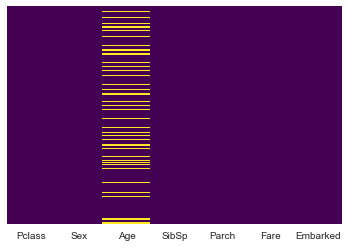

In [70]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [71]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [72]:
med_dict_test = dict(test.groupby(by='Pclass',axis=0)['Age'].median())
med_dict_test

{1: 42.0, 2: 26.5, 3: 24.0}

In [73]:
test['Age'] = test.apply(lambda x: impute_age(x['Age'],x['Pclass'],med_dict_test), axis=1)

In [74]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [75]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [76]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [77]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [78]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [79]:
test_1 = pd.get_dummies(data=test,columns=['Sex','Embarked'],drop_first=True)
test_1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [80]:
test_1_ = scale.fit_transform(test_1)
test_1 = pd.DataFrame(test_1_,columns=test_1.columns)
test_1.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.452723,0.000,0.000000,0.015282,1.0,1.0,0.0
1,1.0,0.617566,0.125,0.000000,0.013663,0.0,0.0,1.0
2,0.5,0.815377,0.000,0.000000,0.018909,1.0,1.0,0.0
3,1.0,0.353818,0.000,0.000000,0.016908,1.0,0.0,1.0
4,1.0,0.287881,0.125,0.111111,0.023984,0.0,0.0,1.0
5,1.0,0.182382,0.000,0.000000,0.018006,1.0,0.0,1.0
6,1.0,0.393380,0.000,0.000000,0.014891,0.0,1.0,0.0
7,0.5,0.340630,0.125,0.111111,0.056604,1.0,0.0,1.0
8,1.0,0.235131,0.000,0.000000,0.014110,0.0,0.0,0.0
9,1.0,0.274693,0.250,0.000000,0.047138,1.0,0.0,1.0


In [81]:
calc_vif(test_1)

,variables,VIF
0,Pclass,3.893135
1,Age,4.404744
2,SibSp,1.416764
3,Parch,1.416341
4,Fare,2.121736
5,Sex_male,2.813280
6,Embarked_Q,1.683858
7,Embarked_S,3.645547


In [82]:
test_1_new = test_1[selected_features_BE]

In [83]:
test_pred = logmodel_2.predict(test_1_new)

In [84]:
updated_submission_6095['Survived'] = test_pred

In [85]:
updated_submission_6095

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [86]:
updated_submission_6095.to_csv('updated_submission_6095.csv',index=False)